In [5]:
cd Measurement-automation/

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [1]:
%pylab inline
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
from scipy.signal import correlate, find_peaks

In [3]:
rc("font", **{"size":15})

In [4]:
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

In [6]:
from lib2.MeasurementResult import *

In [7]:
anti = MeasurementResult.load("Xmon 2Q Mixed FB (1810_007_1)", "I-two-tone_coil_loop_anticross")

0 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 19 2018/16-26-01 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
1 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 28 2018/14-40-37 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
2 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 28 2018/18-34-34 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
3 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 29 2018/13-13-55 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
4 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 29 2018/13-24-01 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
5 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 29 2018/13-46-30 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
6 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 29 2018/13-54-33 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticross.pkl
7 data/Xmon 2Q Mixed FB (1810_007_1)/Nov 30 2018/11-14-59 - I-two-tone_coil_loop_anticross/I-two-tone_coil_loop_anticr

In [8]:
currents, data, freqs = anti.get_data().values()

In [9]:
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

In [10]:
ao = AnticrossingOracle("transmon", anti, True, True)

KeyError: 'current'

6.5389e+09, 2.1001e+07, 4.0164e-04, -6.5355e-05, 8.9659e+09, 4.1339e-01 loss: 0.09 MHz


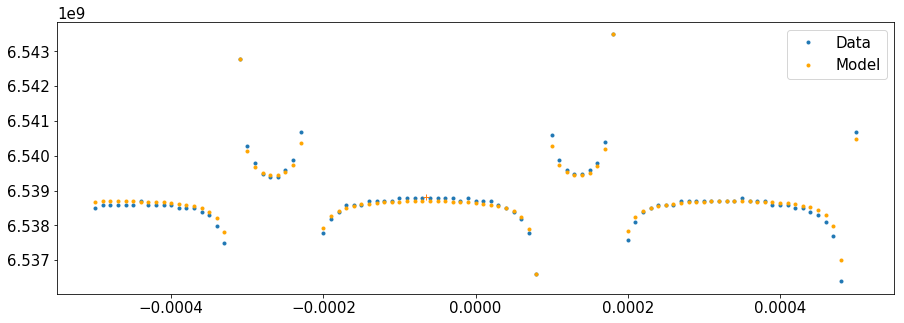

In [11]:
result = ao.launch()[0]

In [25]:
result

array([6.86669303e+09, 3.00000000e+07, 8.20000000e-04, 1.90000000e-04,
       8.20000000e+09, 8.00000000e-01])

In [16]:
params = result

ds = linspace(0,1, 100)
freqs = linspace(4e9, 12e9, 100)

L = []
for d in ds:
    params[-1] = d
    row = []
    for freq in freqs:
        params[-2] = freq
        row.append(ao._cost_function(params, ao._res_points[:,0], ao._res_points[:,1]))
    L.append(row)
L = array(L)

6.5389e+09, 2.1001e+07, 4.0164e-04, -6.5355e-05, 9.4141e+09, 1.0000e+00 loss: 0.52 MHz


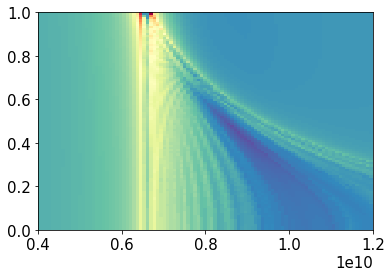

In [19]:
pcolormesh(freqs, ds, L, cmap="Spectral_r")

In [22]:
import lib2

In [23]:
from importlib import reload

In [60]:
reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *

In [63]:
so._threshold

0.0004084827308504326

In [64]:
len(so._points)

1747

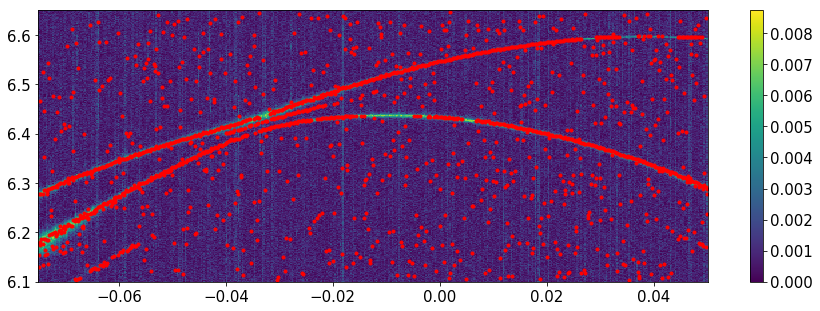

In [61]:
so = SpectrumOracle("transmon", anti, [30e-2, -1.5e-2, 6.4e9, 0.7], plot=True)

In [49]:
len(so._coarse_brute_nop_ranking)

2922

Done: 4.14%, 280/6732, [3.00e-01, -3.00e-02, 6.40e+00, 3.40e-01], mean_dist: 1.15e-01 , chosen points: 350.0
Done: 4.29%, 290/6732, [3.00e-01, -3.00e-02, 6.48e+00, 2.60e-01], mean_dist: 1.44e-01 , chosen points: 350.0
Done: 4.44%, 300/6732, [3.00e-01, -3.00e-02, 6.55e+00, 1.80e-01], mean_dist: 7.03e-02 , chosen points: 150.0
Done: 4.59%, 310/6732, [3.00e-01, -3.00e-02, 6.63e+00, 1.00e-01], mean_dist: 6.42e-02 , chosen points: 150.0
Done: 4.74%, 320/6732, [3.00e-01, -3.00e-02, 6.63e+00, 9.00e-01], mean_dist: 6.02e-02 , chosen points: 150.0
Done: 12.46%, 840/6732, [3.00e-01, -2.73e-02, 6.40e+00, 2.60e-01], mean_dist: 1.28e-01 , chosen points: 250.0
Done: 12.61%, 850/6732, [3.00e-01, -2.73e-02, 6.48e+00, 1.80e-01], mean_dist: 1.70e-01 , chosen points: 350.0
Done: 12.76%, 860/6732, [3.00e-01, -2.73e-02, 6.55e+00, 1.00e-01], mean_dist: 9.41e-02 , chosen points: 250.0
Done: 12.91%, 870/6732, [3.00e-01, -2.73e-02, 6.55e+00, 9.00e-01], mean_dist: 7.02e-02 , chosen points: 200.0
Done: 20.78%, 1

Done: 31.71%, 880/2772, [3.00e-01, -2.18e-02, 6.54e+00, 8.20e-01], mean_dist: 1.61e-02 , chosen points: 150.0
Done: 34.96%, 970/2772, [3.00e-01, -1.91e-02, 6.42e+00, 6.40e-01], mean_dist: 3.04e-02 , chosen points: 200.0
Done: 35.32%, 980/2772, [3.00e-01, -1.91e-02, 6.42e+00, 8.40e-01], mean_dist: 4.30e-02 , chosen points: 300.0
Done: 35.68%, 990/2772, [3.00e-01, -1.91e-02, 6.43e+00, 8.20e-01], mean_dist: 3.67e-02 , chosen points: 350.0
Done: 36.04%, 1000/2772, [3.00e-01, -1.91e-02, 6.44e+00, 8.00e-01], mean_dist: 2.68e-02 , chosen points: 350.0
Done: 36.40%, 1010/2772, [3.00e-01, -1.91e-02, 6.45e+00, 7.80e-01], mean_dist: 2.80e-02 , chosen points: 350.0
Done: 36.76%, 1020/2772, [3.00e-01, -1.91e-02, 6.46e+00, 7.60e-01], mean_dist: 2.29e-02 , chosen points: 300.0
Done: 37.12%, 1030/2772, [3.00e-01, -1.91e-02, 6.47e+00, 7.40e-01], mean_dist: 3.24e-02 , chosen points: 300.0
Done: 37.48%, 1040/2772, [3.00e-01, -1.91e-02, 6.48e+00, 7.20e-01], mean_dist: 2.66e-02 , chosen points: 250.0
Done:

Done: 78.61%, 2180/2772, [3.00e-01, -5.45e-03, 6.47e+00, 6.40e-01], mean_dist: 2.26e-02 , chosen points: 200.0
Done: 78.97%, 2190/2772, [3.00e-01, -5.45e-03, 6.47e+00, 8.40e-01], mean_dist: 2.68e-02 , chosen points: 250.0
Done: 79.33%, 2200/2772, [3.00e-01, -5.45e-03, 6.48e+00, 8.20e-01], mean_dist: 1.88e-02 , chosen points: 250.0
Done: 79.69%, 2210/2772, [3.00e-01, -5.45e-03, 6.49e+00, 8.00e-01], mean_dist: 2.66e-02 , chosen points: 250.0
Done: 80.05%, 2220/2772, [3.00e-01, -5.45e-03, 6.50e+00, 7.80e-01], mean_dist: 2.78e-02 , chosen points: 300.0
Done: 80.41%, 2230/2772, [3.00e-01, -5.45e-03, 6.51e+00, 7.60e-01], mean_dist: 3.02e-02 , chosen points: 300.0
Done: 80.77%, 2240/2772, [3.00e-01, -5.45e-03, 6.52e+00, 7.40e-01], mean_dist: 3.20e-02 , chosen points: 350.0
Done: 81.13%, 2250/2772, [3.00e-01, -5.45e-03, 6.53e+00, 7.20e-01], mean_dist: 3.22e-02 , chosen points: 300.0
Done: 81.49%, 2260/2772, [3.00e-01, -5.45e-03, 6.54e+00, 7.00e-01], mean_dist: 2.60e-02 , chosen points: 250.0
D

Done: 100%, polishing..., [3.999e-01, -1.171e-02, 6.283e+00, 7.746e-01, 1.218e-01], dist:1.11e-02 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.011e-01, -1.175e-02, 6.441e+00, 7.465e-01, 1.222e-01], dist:7.21e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.036e-01, -1.152e-02, 6.439e+00, 7.591e-01, 1.262e-01], dist:6.80e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.009e-01, -1.125e-02, 6.441e+00, 7.605e-01, 1.251e-01], dist:6.68e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.022e-01, -1.126e-02, 6.441e+00, 7.603e-01, 1.270e-01], dist:5.98e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.018e-01, -1.096e-02, 6.441e+00, 7.637e-01, 1.318e-01], dist:6.01e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.044e-01, -1.090e-02, 6.441e+00, 7.613e-01, 1.324e-01], dist:6.03e-03 , chosen points: 500 , bin: 125
Done: 100%, polishing..., [4.046e-01, -1.097e-02, 6.440e+00, 7.617e-01, 1.306e-01], dist:6

array([ 4.03745490e-01, -1.10189986e-02,  6.44039390e+09,  7.61789092e-01,
        1.30871052e-01])

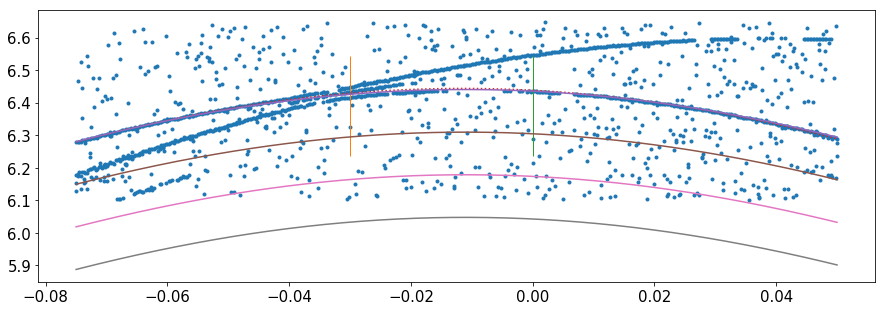

In [62]:
so.launch()